<h3 style="color:#7171C6;"> Week 06 - Sizing a shell and tube heat exchanger </h3>

Water at 15<sup>o</sup>C with a mass flow rate of 8 kg/s is available to cool hot oil from 90<sup>o</sup>C to 30<sup>o</sup>C. The oil mass flow rate is 5 kg/s. A shell-and-tube heat exchanger with one-shell pass and four tube-passes is proposed for this process. Using uniform cp values of 2.5 kJ/(kg<sup>o</sup>C) and 4.2 kJ/(kg<sup>o</sup>C) for oil and water, respectively, and assuming an overall heat transfer coefficient of 250 W/(m<sup>2</sup>.<sup>o</sup>C) for the heat exchanger

<img src="img\1shell-2tube-heatexchanger.png" width="280px">

<em>
1. determine the surface area of the heat exchanger, and therefore a combination in the diameter of the pipe with its horizontal length (max. length of 20m due to limited space) per tube-pass.
2. if more power is used to pump the water through more rapidly, a greater cooling effect will occur. Repeat by looking at the effect of the mass flow rate at 10kg/s, 20kg/s, 30kg/s on the size of the heat exchanger. The information will help if there are space constraints in installing the heat exchanger
</em>

In [25]:
#############################
# Define the known conditions
#############################
tColdIn = 15
tHotIn = 90
tHotOut = 30
mfrWater = 8
mfrOil = 5
CpOil = 2500
CpWater = 4200
U = 250


#############################
# Using the specific heat and mass flow rate data calculate the heat capacity rates 
# Cc and Ch
#############################
Cc = CpWater*mfrWater 
Ch = CpOil*mfrOil


#############################
# Calculate the heat flux for the hot fluid (since these temperatures are known)
#############################
q = Ch*(tHotIn - tHotOut)


#############################
# The heat flux for the hot fluid must equal the heat flux for the cold fluid.
# Use this relationship to calculate the outlet cold temperature
#############################
tColdOut = tColdIn + q/Cc


Now that you have determined all four temperatures the LMTD method can be used which involves determining the correction factor. When using a formula to calculate the correction factor the dimensionless P, and R terms are defined as:

P = (tColdOut - tColdIn) / (tHotIn - tColdIn)

R = (tHotIn - tHotOut) / (tColdOut - tColdIn)

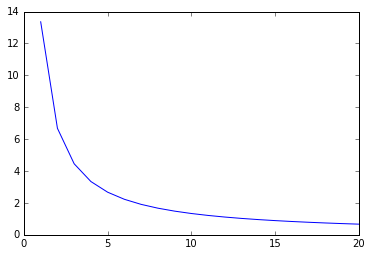

In [26]:
# P, R definitions
#############################
P = (tColdOut - tColdIn) / (tHotIn - tColdIn)
R = (tHotIn - tHotOut) / (tColdOut - tColdIn)


# The correction factor equations for 1-shell 2n-tube passes is given below in a
# function F12
import math
def F12(P,R):
    s = math.sqrt(1+R**2)
    a = s/(1-R)*math.log((1-R*P)/(1-P))
    b = math.log((2-P*(1+R-s))/(2-P*(1+R+s)))
    f = a/b
    return(f)

# Similary the correction factor equations for 2-shell 2n-tube passes is given 
# below in a # function F24
def F24(P,R):
    s = math.sqrt(1+R**2)
    ss = math.sqrt((1-P)*(1-P*R))
    a = s/(2*(R-1))*math.log((1-P)/(1-P*R))
    numer = 2/P - 1 - R + 2/P*ss + s
    denom = 2/P - 1 - R + 2/P*ss - s
    b = math.log(numer/denom)
    f = a/b
    return(f)

#############################
# Simply call either function based on the number of shell passes to obtain
# the correction factor
f = F12(P,R)
#############################

#############################
# Determine the heat exchanger area required using q = UA*LMTD 
# (you have to calculate LMTD first)
dt1 = tHotIn - tColdOut
dt2 = tHotOut - tColdIn
LMTD = (dt1-dt2)/math.log(dt1/dt2)
A = q/(U*LMTD*f)
#############################


#############################
# plot the diameter of pipe vs length of pipe from 1m to 20m length per pass
# import our favourite modules numpy and matplotlib
#############################
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  # use this command to plot the graph inside python notebook
L = np.arange(1,21)
D = A /(math.pi*L) / 4 # divide by 4 again because I have 4-passes
plt.plot(L,D)

# what does the plot tell us? 
# It tells us for a given length we need x-diameter pipe
# e.g. at 20m in length we need a 40cm diameter pipe

We need to repeat the analysis with the mass flow rate changing.
A simple way to do this is to simply use a for loop to repeat the calculations iterating through different mass flow rates. We would also only need to recalculate the equations that are affected by the mass flow rate.

[126.88375010441409, 103.36255882770828, 95.83855570833623, 92.062548595039331, 89.782970706511747, 88.25509983297853, 87.159001696411678]


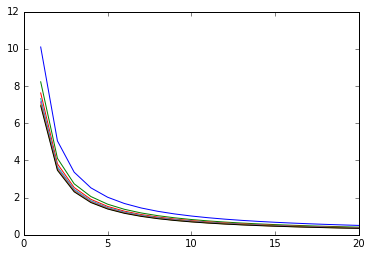

In [28]:
# Set up a for loop to loop over the mass flow rate change. During each set of
# calculations, you should store the data and plot the data at the same time.
# Use numpy.arange(start, stop, step) function to create a list of mass flow rates
# e.g. numpy.arange(10, 60, 10) will create an array([10, 20, 30, 40, 50])
# You can print multiple plots by plotting each set of results at the end of each
# iteration

areaChange=[]
for i in np.arange(10,41,5):
    mfrWater = i
    Cc = CpWater*mfrWater 
    tColdOut = tColdIn + q/Cc
    P = (tColdOut - tColdIn) / (tHotIn - tColdIn)
    R = (tHotIn - tHotOut) / (tColdOut - tColdIn)
    f = F12(P,R)
    dt1 = tHotIn - tColdOut
    dt2 = tHotOut - tColdIn
    LMTD = (dt1-dt2)/math.log(dt1/dt2)
    A = q/(U*LMTD*f)
    areaChange.append(A)
    D = A /(math.pi*L) / 4
    plt.plot(L,D)
    
print(areaChange)